<a href="https://colab.research.google.com/github/Dominika26/machine-learning-bootcamp/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Walidacja krzyżowa**- Polega na podzieleniu zbioru treningowego na k mniejszych części i trenowaniu osobno k-1 części i oceniamy na 1 pozostałej części (zbiór walidacyjny). WYniki są uśredniane. Potem inny zbiór staje się walidacyjnym i liczymy  na pozostałych. Czyli jak mam 5 zbiorów, to 5 razy robimy takie trenowanie, za każdym razem z innym zbiorem walidacyjnym. Końcową ocenę przeprowadzamy na zbiorze testowym. 

In [10]:
!pip install scikit-learn

In [11]:
!pip install --upgrade scikit-learn

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_moons 
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

In [13]:
# n_samples 
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}\n')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]



In [14]:
df = pd.DataFrame(data = np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


In [15]:
px.scatter(df, x='x1', y='x2', color='target', width=700, height=400)

In [16]:
from sklearn.model_selection import train_test_split 
# domyślnie 25% to testowe 
X_train, X_test, y_train, y_test = train_test_split(data, target)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1500, 2)
X_test shape: (500, 2)
y_train shape: (1500,)
y_test shape: (500,)


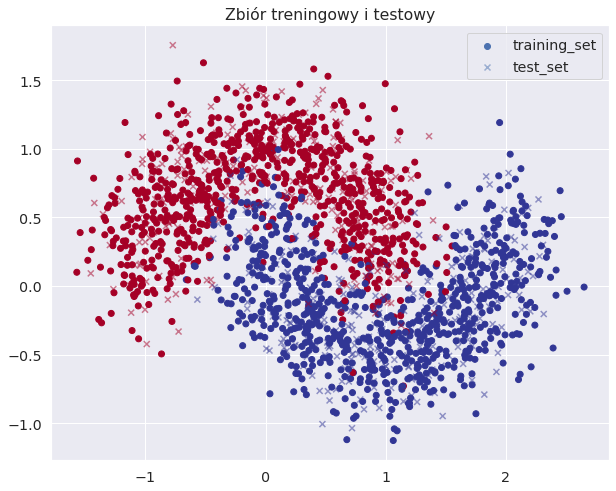

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

Budowa modelu 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



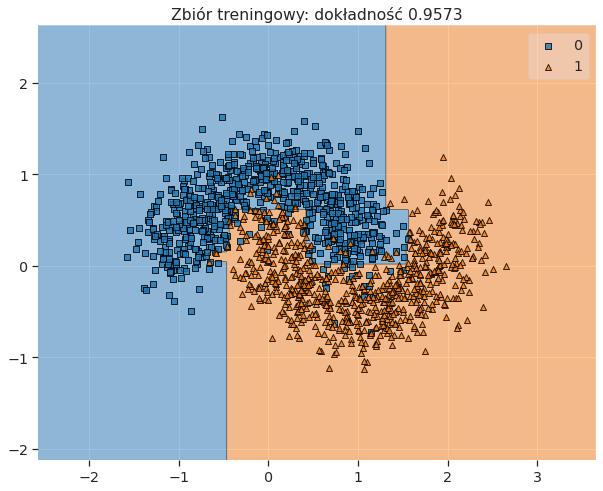

In [20]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



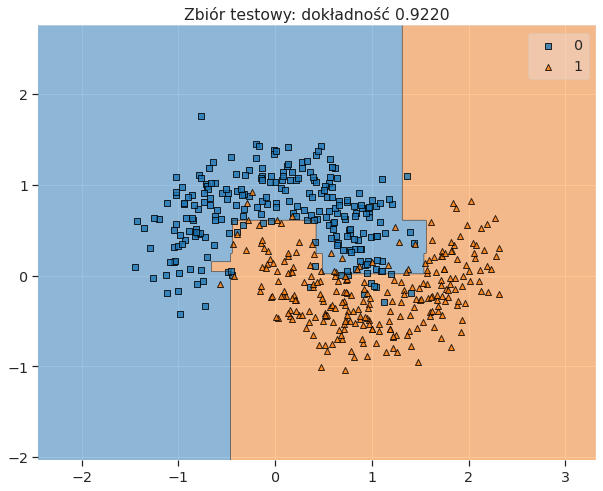

In [22]:

plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

**Walidacja krzyżowa**

In [33]:
# estimator- nasz model; dane traningowe; cv- ile wykonujemy podziałów
from sklearn.model_selection import cross_val_score
calssifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=15)
scores

#otrzymuję listę dokładnośći

array([0.93, 0.93, 0.97, 0.96, 0.95, 0.92, 0.94, 0.96, 0.94, 0.98, 0.93,
       0.94, 0.93, 0.96, 0.94])

In [34]:
# liczę średnią i odchylenie standardowe tych moich dokładności 

print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')
#otrzymuję wyższą dokładność 

Accuracy: 0.9453 (+/- 0.0167)


In [35]:
scores = pd.DataFrame(scores, columns=['accuracy'])
scores

,accuracy
0,0.93
1,0.93
2,0.97
3,0.96
4,0.95
5,0.92
6,0.94
7,0.96
8,0.94
9,0.98


In [36]:
px.bar(scores, y='accuracy', color='accuracy', width=700, height=400, 
       title=f'Walidacja krzyżowa (15 podziałów) | Accuracy: {scores.mean()[0]:.4f} (+/- {scores.std()[0]:.3f})',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min()[0] - 0.01, 1.0])

#jak mam mały zbiór to te wyniki się między sobą różnią 